# Mixture of Gaussians

# Plotting a model

In [1]:
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt

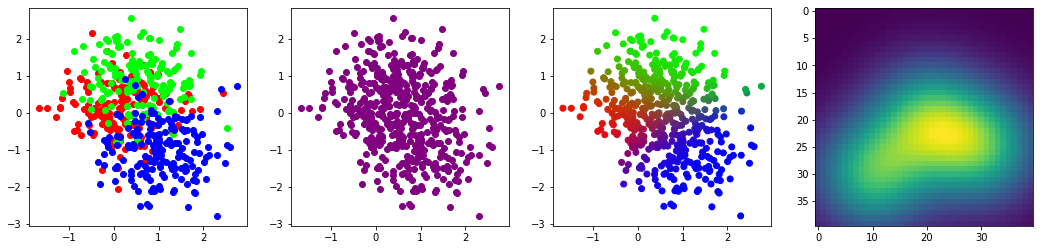

In [6]:
# The gaussians are the conditional probabilities given the coefficients
gaussians = [
    multivariate_normal([0, 0], np.array([[0.5,0],[0,0.5]])),
    multivariate_normal([0.5, 1], np.array([[0.5,0],[0,0.5]])),
    multivariate_normal([1, -1], np.array([[0.5,0],[0,0.5]]))
]

# The coefficients are like the prior probabilities of the model
coeffs = np.array([0.3, 0.3, 0.3]).reshape(1, len(gaussians)) 

k= len(gaussians)
colors = [(1,0,0), (0,1,0), (0,0,1)]

a = np.random.randint(0, k, 500) # Should be one hot but for easiness we just take the index (would be argmax)

created_data = np.vstack([gaussians[i].rvs(1) for i in a])

fig, plots = plt.subplots(ncols=4, nrows=1, figsize=(18,4))
for i in np.unique(a):
    subset = created_data[i == a]
    plots[0].scatter(subset[:,0], subset[:,1], color=colors[i])
    
plots[1].scatter(created_data[:,0], created_data[:,1], c='purple')

# The responsibility is the probability (or fraction of response) that a hidden gaussian has on an input example x
resps = coeffs  * np.stack([gaussian.pdf(created_data) for gaussian in gaussians], axis=1)
resps = resps / resps.sum(axis=1, keepdims=True)

plots[2].scatter(created_data[:, 0], created_data[:, 1], c=resps)

x, y = np.mgrid[-2:2:0.1, -2:2:0.1]
ps = np.dstack([x,y])

# So the above data is generated from the latent variables (possible since it is a generative model). We can also do
# classifications with this model by summing the probability of a point occuring given the latent models
plots[3].imshow(sum([coeffs[0][i] * gaussian.pdf(ps) for i, gaussian in enumerate(gaussians)]))

Left is the label of the generated data given by the argmax of the latent variable Z. In the middle is the 
marginal distribution p(x), note that the information about the variable z is lost (we marginalized over that one)
Right is the probability of the datapoints belonging to one of the latens gaussianss

# Learning the parameters of a mixture of gaussians

In [225]:
from sklearn.datasets import make_blobs

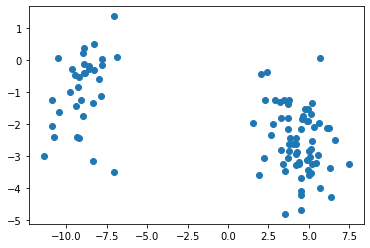

In [317]:
k = 2
data, labels = make_blobs(n_features=2)
plt.scatter(data[:,0], data[:,1])

In [318]:
# Some initial data
means = [data[0], data[1]]
coeffs = np.array([0.5, 0.5])
cov = [np.array([[2, 1],[1, 2]]), np.array([[2, 1],[1, 2]])]

In [319]:
def evaluate_loglikelihood(means, coeffs, cov):
    total = np.zeros(100)

    for i in range(2):
        total += (coeffs[i] * multivariate_normal(means[i], cov[i]).pdf(data))

    return np.log(total).sum()

In [320]:
def calculate_new_mean(responsibilities, data):
    normalisation = 1 / responsibilities.sum()
    
    return normalisation * ((responsibilities * data).sum())

In [ ]:
def calculate_responsibilities(means, cov, data, coefficients):
    resps = np.zeros(())

In [ ]:
calculate_new_mean(resps[])

In [312]:
evaluate_loglikelihood(means, coeffs, cov)

-2524.8970213752514

In [313]:
total = (coeffs[0] * multivariate_normal(means[0], cov[0]).pdf(data.T)) + (coeffs[1] * multivariate_normal(means[1], cov[1]).pdf(data.T))
k0 = coeffs[0] * multivariate_normal(means[0], cov[0]).pdf(data.T) / total

resps = np.zeros((2, 100))
resps[0, :] = k0
resps[1, :] = 1 - k0

In [314]:
means = [(1 / resps[0, :].sum()) * (resps[0, :].reshape(100, 1) * data.T).sum(axis=0), (1 / resps[1, :].sum()) * (resps[1, :].reshape(100, 1) * data.T).sum(axis=0)]

# Mixture of multinoullis

In [170]:
def calculate_class_cond_bernoulli(input_, probs): # Input is a binary vector (so only one and zero)
    prob = 1
    
    for i in range(len(probs)):
        prob *= bernoulli(probs[i]).pmf(input_[i])
        
    return prob

In [184]:
bitvector_size = int(8*8)
binar_input = np.random.randint(0, 2, (1, bitvector_size))

In [186]:
weights = [0.4, 0.2, 0.2, 0.1, 0.1] # Mixing weights
probs = [np.random.uniform(0, 1, bitvector_size), # These give the probability of the bit being 1
         np.random.uniform(0, 1, bitvector_size), 
         np.random.uniform(0, 1, bitvector_size), 
         np.random.uniform(0, 1, bitvector_size),               
         np.random.uniform(0, 1, bitvector_size)]

In [189]:
mixture = 0

for weight, prob in zip(weights, probs):
    mixture += weight * calculate_class_cond_bernoulli(binar_input[0], prob)

# Classification of the MNIST dataset

In [195]:
from sklearn.datasets import load_digits


In [197]:
digits = load_digits()

In [200]:
X = digits['data']
y = digits['target']

In [204]:
X = X[y < 3]

In [205]:
X.shape

(537, 64)

In [ ]:
k = 